# Linear least squares fit

## Tasks

Perform a least squares fit of a parabola

$$ y(x) = \theta_0 + \theta_1 x + \theta_2 x^2$$

for the seven independent measurments $(x_i, y_i)$ given by $(-0.75, 1.0 \pm 1.0)$, $(-0.5, 4.0 \pm 1.0)$, $(-0.25, 4.0 \pm 0.5)$, $(0.0, 5.5 \pm 0.5)$, $(0.25, 4.5 \pm 0.5)$, $(0.5, 5.5 \pm 1.0)$, $(0.75, 3.0 \pm 1.0)$. 

a) Determine the best fit parameters $\hat \theta_i$ and their covariances using the formula for linear least squares fits.

b) Determine the $\chi_\mathrm{obs}^2$ for the best fit parameter. What is the number of degrees of freedom? Plot the $\chi^2$ distribution and indicate $\chi_\mathrm{obs}^2$ in this plot (e.g. by drawing a line at this value).
What is the $p$-value for this fit?

c) Plot the fitted parabola and the $1\sigma$ error band around it as obtaind from the error propagation formula $\sigma_y^2 = A^\mathrm{T} U A$. What is the predicted value $y$ at $x=1$ and its uncertainty?

d) Compare the fit result and the covariance matrix with the results obtained with iminuit. Do the results agree?

e) Determine the $p$-value for a straight-line fit. Is thhis an acceptable description of the data?


### Hints

1) The following numpy functions might come in very handy
* diagonal matrix from vector v in numpy: *A = np.diagflat(v)*
* matrix from column vectors v0, v1, v2: *A = np.column_stack((v0, v1, v2))*
* multiplication of matrices A and B in numpy: *C = A.dot(B)*
* transposed matrix: *A_T = np.transpose(A)*
* inverse matrix: *A_inv = inv(A)*, this requires *from numpy.linalg import inv*

2) It might be useful to write a function which returns the uncertainty $\sigma_y$ for a numpy array of $x$ values. A function $f$ that only works for a scalar value $x$ can be vectorized (i.e., it works also for numpy arrays) with *numpy.vectorize*.

3) Data points with error bars can be drawn with *plt.errorbar(x, y, yerr=sigma_y)*

4) A band between $y$ values can be drawn with the aid of *matplotlib.pyplot.fill_between*

## Comments on Python's `iminuit`

The KIP service has iminuit version 1.3.8. Please note that the most recent version is $\geq2.0.0$ and that the [documentation](https://iminuit.readthedocs.io/en/stable/) applies to *that* version. Some backward-incompatible changes have been introduced, some of which changed some interfaces. For your tasks that mainly affects the `minuit.Minuit` constructor. The following shows the construction of a `Minuit` object for version 1.3.8 (in case you use the KIP service or a version $<2.0.0$) and $\geq2.0.0$ (in case you use another service implementing a higher version), respectively.
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=1
# likelihood method: errordef=0.5
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1, errordef=1)
```

And this would be the equivalent workflow for versions >2.0.0
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=Minuit.LEAST_SQUARES
# likelihood method: errordef=Minuit.LIKELIHOOD

# add errordef as an attribute of your defined minimisation function which will be checked for when optimised
func.errordef = Minuit.LEAST_SQUARES
m = Minuit(func, par1=0.1 par2=0.1, ..., parN=0.1)
```

Another (potenitally) Jupiter related *feature* is the fact that `m.migrad()`, `m.matrix()`, `m.minos()` etc. can yield a nice summary of the respective procedure. However, in order to show it, either of these methods (and potentially others in case you use them) have to be *the last line of a code cell*. If there is *anything* coming afterwards, the output will not be printed, hence, for anything that follows, it is recommended to start a new code cell.


## Solution

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from iminuit import Minuit
from IPython.display import display, Latex
from sympy import *

In [12]:
# data
x = np.array([-0.75, -0.5, -0.25, 0., 0.25, 0.5, 0.75])
y = np.array([1., 4.0, 4., 5.5, 4.5, 5.5, 3])
sigma_y = np.array([1, 1, 0.5, 0.5, 0.5, 1, 1])

a.)

In [29]:
# defining the fit function (in this case a parabola)
def parabola(x, theta_0, theta_1, theta_2):
    return theta_0 + theta_1*x + theta_2*x**2

def SQ_y(theta_0, theta_1, theta_2):
    return np.sum((y_data -parabola(x, theta_0, theta_1, theta_2))**2/sigma_y**2)

SQ_y.errordef = Minuit.LEAST_SQUARES

In [13]:
m = Minuit(SQ_y, theta_0=5 , theta_1=0 , theta_2=7.8 )
m.migrad()
m.hesse()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.661                      │              Nfcn = 129              │
│ EDM = 4.28e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ theta_0 │   4.99    │   0.31    │   -0.31    │    0.31    │         │         │       │
│ 1 │ theta_1 │    1.3    │    0.7    │    -0.7    │    0.7     │         │         │       │
│ 2 │ theta_2 │   -4.9    │    1.4    │    -1.4    │    1.4     │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │        theta_0        │        theta_1        │        theta_2        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.31    │   -0.7    │    0.7    │   -1.4    │    1.4    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────────┬───────────────────────────────┐
│         │   theta_0   theta_1   theta_2 │
├─────────┼───────────────────────────────┤
│ theta_0 │    0.0973  4.39e-10    -0.262 │
│ theta_1 │  4.39e-10     0.471 -1.18e-09 │
│ theta_2 │    -0.262 -1.18e-09      1.97 │
└─────────┴───────────────────────────────┘

Text(0, 0.5, 'y(x)')

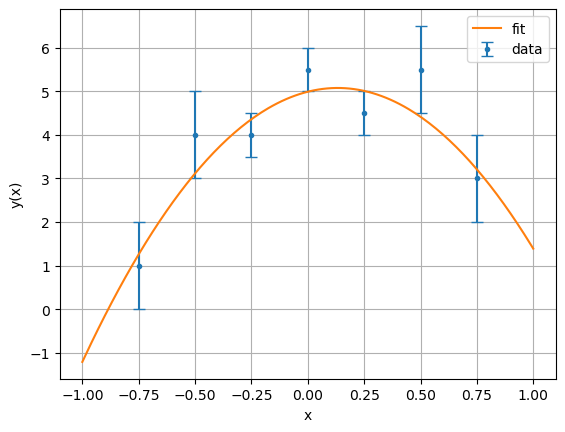

In [15]:
# visualizing the fit

x_cont = np.linspace(-1, 1, 200)
plt.errorbar(x_data, y_data, yerr=sigma_y, capsize=4, fmt='.', label='data')
plt.plot(x_cont, y(x_cont, 4.99, 1.3, -4.9), label='fit')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')

b.) In the previous step we determined the best fit parameters for our data using Minuit. Now we will calculate and the $\chi^2$ and $\chi^2_{obs}$ distribution. We have seven datapoints and three parameters to be optimized, leaving 
$$ dof = 7-3 = 4 $$
degrees of freedom.

In [43]:
# covariance matrix 
C = np.diagflat(sigma_y)

# vector mu
mu = y(x_data, 4.99, 1.3, -4.9)

# degrees of freedom
dof = 4

chi_squared_obs = ((y_data-mu).dot(inv(C).dot(np.transpose(y_data-mu))))
chi_squared__red_obs = chi_squared_obs/dof

print('chi^2_obs = ' + str(chi_squared_obs))

chi^2_obs = 3.3662343749999977


Text(0, 0.5, 'Probability density $P(\\chi^2)$')

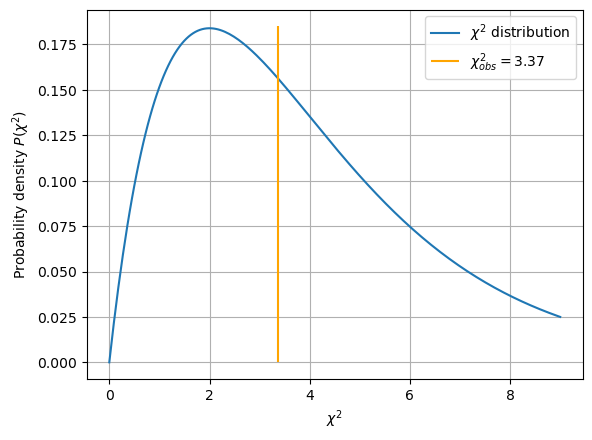

In [45]:
# in our case, n=4 => n/2=2 => \Gamma(n/2)=1!=1

def chi_2(z):
    return z**1*np.exp(-0.5*z)/(2**2 * 1)

z_cont=np.linspace(0,9, 200)
plt.plot(z_cont, chi_2(z_cont), label=r'$\chi^2$ distribution')
plt.vlines(chi_squared_obs, 0, 0.185, color='orange', label=r'$\chi^2_{obs} = 3.37 $')
plt.legend()
plt.grid()
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'Probability density $P(\chi^2)$')

In [48]:
# The p-value of our fit is determined by using the probability density function.
# we will integrate by summing in very small steps

z_cont_2 = np.linspace(0, chi_squared_obs, 500)
F = np.sum(chi_2(z_cont_2)*chi_squared_obs/500)

print('p-value = '+ str(1-F))

p-value = 0.4989845746474235


### a.) Linear least squares fit
Since the parameters $\theta_i$ apear only linearly in the parabolic formula, it is valid to use the method described in the script for linear least squares fits.
The parabolic formula is
$$ f(\vec{\theta}, x) = \sum_{j=0}^2 a_j(x) \theta_i = \sum_{j=0}^2 \theta_j x^j $$
We have seven data points $x_i$, so that the matrix $A$ comes to be
$$ A_{ij} = a_j(x_i) = (x_i)^{j-1} $$
We will define $\vec{x}$, $\vec{y}$ and $\vec{\sigma_y}$ to be seven-dimesional vectors containing the data points and uncertainties. Also $\vec{\theta}$ is a three-dimensional vector containing the parameters. 
In this way, the $\chi^2$-function can be written as 
$$ \chi^2 = \left( \vec{y}- A \cdot \vec{\theta} \right)^T \cdot C^{-1} \cdot \left( \vec{y}- A \cdot \vec{\theta} \right) $$
where $C$ is the covariance matrix. However, we will assume, that the measurements are not correlated, so that $C=\text{diag}(\sigma_i^2)$. 
The $\chi^2$-function above is minimal when
$$ \vec{\theta} = \left(A^TC^{-1}A\right)^{-1}A^TC^{-1}\cdot\vec{y} = G \cdot\vec{y}$$
and the covariance matrix of the parameters comes to be
$$ U = \left(A^TC^{-1}A\right)^{-1} = G C G^T $$
Using numpy's matrix calculation skills, we can now determine the best fitting parameters.

In [16]:
# matrix A
A = np.column_stack((np.ones(7), x, x**2))

# covariance matrix C
C = np.diagflat(sigma_y**2)

# calculating the transformation matrix G
C_inv = inv(C)
A_T = np.transpose(A)
A_TC_invA = A_T.dot(C_inv.dot(A))
G = inv(A_TC_invA).dot(A_T.dot(C_inv))

# calculating and printing the best fitting parameters
Theta = G.dot(y)
for i in range(3):
    display(Latex('${} ={}$'.format((r"""\theta_"""+str(i)), (Theta[i]).round(3))))
    

# calculating and printing  U
U = G.dot(C.dot(np.transpose(G)))

display(Latex('${} ={}{}{}$'.format(r"""U""",latex(Matrix(U)), 
                                    r"""\approx""",latex(Matrix(U.round(3))))))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### b.) classification of the fit using $\chi^2$ distribution
As described in a.) the $\chi^2_{obs}$ value of the best fit parameters can be calculated using the matrices $A$ and $C$. This will now be done, then the $\chi^2$-distribution is plotted. In our case, there are seven data points and three parameters, meaning that there are four degrees of freedom ("dof"). We habe already included this in the formula for the $\chi^2$-distribution.

In [23]:
# calculating chi_squared_obs
y_A_theta = y - A.dot(Theta)
chi_sq_obs = np.transpose(y_A_theta).dot(C_inv.dot(y_A_theta))
display(Latex('${} ={}$'.format(r"""\chi^2_{obs}""",np.round(chi_sq_obs, 3))))


<IPython.core.display.Latex object>

Text(0, 0.5, 'Probability density $P(\\chi^2)$')

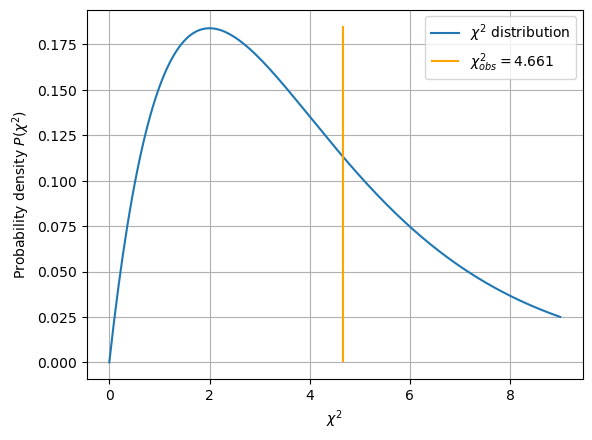

In [24]:
# defining the chi_squared distribution with dof=4
def chi_sq(z):
    return z**1*np.exp(-0.5*z)/(2**2 * 1)

# plotting the chi_squared distribution
z_cont=np.linspace(0,9, 200)
plt.plot(z_cont, chi_sq(z_cont), label=r'$\chi^2$ distribution')
plt.vlines(chi_sq_obs, 0, 0.185, color='orange', label='${} ={}$'.format(r"""\chi^2_{obs}""",
                                                                         np.round(chi_sq_obs,3)))
plt.legend()
plt.grid()
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'Probability density $P(\chi^2)$')

The p-value of the fit is determined through integration of the $\chi^2$ probability density:
$$ p = 1- \int_0^{\chi^2_{obs}} P(\chi^2) \ \text{d}\chi^2 $$
this is done with the help of the scipy.integrate function quad.

In [37]:
from scipy.integrate import quad

p_value = 1 - quad(chi_sq, 0, chi_sq_obs)[0]
display(Latex('$p = {}$'.format(np.round(p_value,3))))

<IPython.core.display.Latex object>

###  c.) Plotting the fitted parabola and eror band
The uncertainty $\sigma_y$ of the fitted values is calculated via the covariance matrix U of the fit parameters:
$$ \sigma_y^2 = A^T\cdot U \cdot A $$

Text(0, 0.5, 'y(x)')

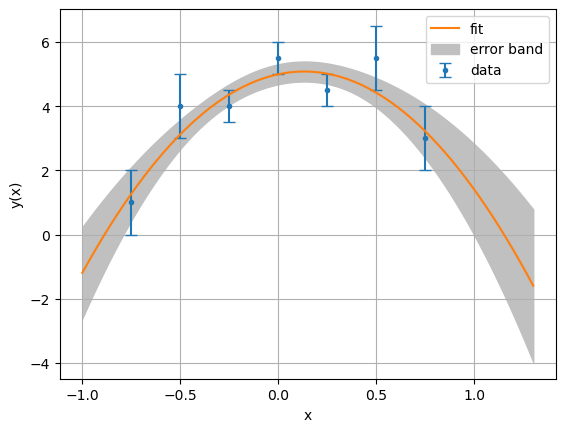

In [38]:
# defining the fit function (in this case a parabola)
def parabola(x, theta_0, theta_1, theta_2):
    return theta_0 + theta_1*x + theta_2*x**2

# defining the error function
def sigma_func(x):
    A_new = np.array([1, x, x**2], dtype='object')
    return np.sqrt(np.transpose(A_new).dot(U.dot(A_new)))
 

x_cont = np.linspace(-1, 1.3, 200)
plt.errorbar(x, y, yerr=sigma_y, capsize=4, fmt='.', label='data')
plt.plot(x_cont, parabola(x_cont, Theta[0], Theta[1], Theta[2]), label='fit')
plt.fill_between(x_cont,parabola(x_cont,Theta[0],Theta[1],Theta[2])+sigma_func(x_cont),
                 parabola(x_cont,Theta[0],Theta[1],Theta[2])-sigma_func(x_cont), 
                 color='silver', label='error band')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')

In [39]:
# calculating the expected value and uncertainty at x=1
y_value = parabola(1, Theta[0], Theta[1], Theta[2])
sigma_value = sigma_func(1)
display(Latex('${} ={}{}{}$'.format(r"""f(x=1)""", np.round(y_value, 3),
                                    r""" \pm """, np.round(sigma_value, 3))))


<IPython.core.display.Latex object>

### d.) Comparing the fit with that done in Minuit
Instead of using the linear least squares method to fit the parameters of the parabola, we could also use the numerical minimisation tool Minuit in order to find the parameters which minimize the $\chi^2$ value of our function.

In [35]:
# defining the chi squared value as a function of the parameters
def SQ_y(theta_0, theta_1, theta_2):
    return np.sum((y_data -parabola(x, theta_0, theta_1, theta_2))**2/sigma_y**2)

SQ_y.errordef = Minuit.LEAST_SQUARES
m = Minuit(SQ_y, theta_0=5 , theta_1=0 , theta_2=7.8 )
m.migrad()
m.hesse()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.661                      │              Nfcn = 129              │
│ EDM = 4.28e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ theta_0 │   4.99    │   0.31    │   -0.31    │    0.31    │         │         │       │
│ 1 │ theta_1 │    1.3    │    0.7    │    -0.7    │    0.7     │         │         │       │
│ 2 │ theta_2 │   -4.9    │    1.4    │    -1.4    │    1.4     │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │        theta_0        │        theta_1        │        theta_2        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.31    │   -0.7    │    0.7    │   -1.4    │    1.4    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────────┬───────────────────────────────┐
│         │   theta_0   theta_1   theta_2 │
├─────────┼───────────────────────────────┤
│ theta_0 │    0.0973  4.39e-10    -0.262 │
│ theta_1 │  4.39e-10     0.471 -1.18e-09 │
│ theta_2 │    -0.262 -1.18e-09      1.97 │
└─────────┴───────────────────────────────┘

As we can see in the first table, the values determined for $\theta_1$, $\theta_2$ and $\theta_3$ are completely in accordance with one another, the only difference is the number of decimals to which the results were rounded.
The covariance matrix is also the same, the only difference, again, being rounding.

### e.) Quality of a straight line fit
We will now fit a straight line to the data and calculate the p-value as done before with the parabola.

In [40]:
# defining the function for the straight line
def line(x, a, b):
    return a*x + b

# matrix A^prime for the new function
A_straight = np.column_stack((np.ones(7), x))

# covariance matrix C (the same as before)
C = np.diagflat(sigma_y**2)

# calculating the transformation matrix G
C_inv = inv(C)
A_straight_T = np.transpose(A_straight)
A_straight_TC_invA_straight = A_straight_T.dot(C_inv.dot(A_straight))
G_straight = inv(A_straight_TC_invA_straight).dot(A_straight_T.dot(C_inv))

# calculating the best fitting parameters
params = G_straight.dot(y)

# calculating U
U_straight = G_straight.dot(C.dot(np.transpose(G_straight)))

# calculating chi^2_{obs} for the straight line fit
y_A_straight_params = y - A_straight.dot(params)
chi2_obs = np.transpose(y_A_straight_params).dot(C_inv.dot(y_A_straight_params))

# calculating the p-value
p_value_straight = 1- quad(chi_sq, 0, chi2_obs)[0]
display(Latex('$p = {}$'.format(np.round(p_value_straight,3))))

<IPython.core.display.Latex object>

With a p-value of $p<0.005$, the modell of a straight-line must definitley be regarded as ill-fitting to describe the data at hand. A visual representation of how bad the fit is can be given by plotting the data and fit.

Text(0, 0.5, 'y(x)')

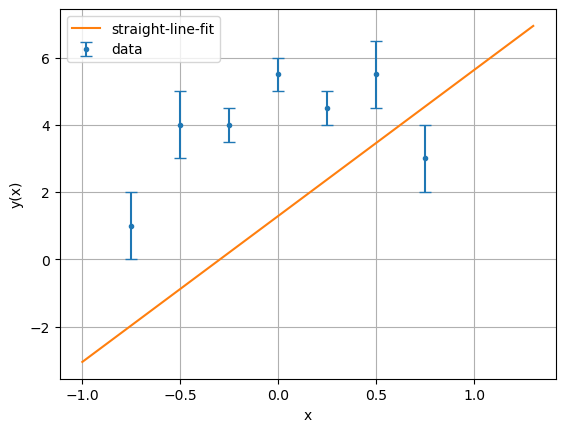

In [41]:
x_cont = np.linspace(-1, 1.3, 200)
plt.errorbar(x, y, yerr=sigma_y, capsize=4, fmt='.', label='data')
plt.plot(x_cont, line(x_cont, params[0], params[1]), label='straight-line-fit')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')